# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [83]:
# pip install newsapi-python

In [84]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mcmachine/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [85]:
# Read your api key environment variable
load_dotenv()
news_api = os.getenv("NEWS_API_KEY")
#print(news_api)

In [86]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(news_api)

In [87]:
# Fetch the Bitcoin news articles
bitcoin = newsapi.get_everything(q='Bitcoin', language="en")
bitcoin

{'status': 'ok',
 'totalResults': 6631,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Jon Fingas',
   'title': 'AMC theaters will accept cryptocurrencies beyond Bitcoin',
   'description': "You won't have to stick to Bitcoin if you're determined to pay for your movie ticket with cryptocurrency. AMC chief Adam Aron has revealed his theater chain will also accept Ethereum, Litecoin and Bitcoin Cash when crypto payments are available. He didn't hav…",
   'url': 'https://www.engadget.com/amc-theaters-accept-ethereum-litecoin-bitcoin-cash-132642183.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-09/4a01cb80-16eb-11ec-abfe-c7b840dd48ca',
   'publishedAt': '2021-09-16T13:26:42Z',
   'content': "You won't have to stick to Bitcoin if you're determined to pay for your movie ticket with cryptocurrency. AMC chief Adam Aron has revealed his theater chain will also accept Ethereum, Litecoin and Bi… [+1198 chars]"},
  {'source': {'id': 'enga

In [88]:
# Fetch the Ethereum news articles
ethereum = newsapi.get_everything(q='Ethereum', language="en")
ethereum

{'status': 'ok',
 'totalResults': 2670,
 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Kim Lyons',
   'title': 'China’s central bank bans cryptocurrency transactions to avoid ‘risks’',
   'description': 'China’s central bank on Friday said cryptocurrency transactions in the country are illegal, banning all transactions. It said cryptocurrencies like bitcoin and Ethereum are not legal tender and can’t be circulated.',
   'url': 'https://www.theverge.com/2021/9/24/22691472/china-central-bank-cryptocurrency-illegal-bitcoin',
   'urlToImage': 'https://cdn.vox-cdn.com/thumbor/mde_l3lUC4muDPEFG7LYrUz0O3g=/0x146:2040x1214/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/8921023/acastro_bitcoin_2.jpg',
   'publishedAt': '2021-09-24T16:22:55Z',
   'content': 'Its the countrys latest crackdown on digital currencies\r\nIllustration by Alex Castro / The Verge\r\nThe Peoples Bank of China, the countrys central bank, said Friday that cryptocurrency transact

In [7]:
ethereum['articles'][0].keys()

dict_keys(['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt', 'content'])

In [8]:
text = analyzer.polarity_scores(ethereum['articles'][0]['content'])

In [9]:
def get_sent_df(texts):
    df_data = []
    for x in texts:
        sent = analyzer.polarity_scores(x['content'])
        df_data.append(
            {
                "text":x['content'],
                "neg": sent["neg"],
                "neu": sent["neu"],
                "pos": sent["pos"],
                "compound": sent["compound"],
            }
        )
    return pd.DataFrame(df_data)

In [89]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_df = get_sent_df(bitcoin['articles'])
bitcoin_df.head()

,text,neg,neu,pos,compound
0,You won't have to stick to Bitcoin if you're d...,0.036,0.838,0.127,0.5574
1,Four months after Twitter first introduced in-...,0.000,1.000,0.000,0.0000
2,"<ul><li>Bitcoin, in terms of market value, ros...",0.000,0.924,0.076,0.3400
3,Bitcoin and similar blockchain-based cryptos e...,0.000,1.000,0.000,0.0000
4,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,0.116,0.884,0.000,-0.2411


In [90]:
# Create the Ethereum sentiment scores DataFrame
ethereum_df = get_sent_df(ethereum['articles'])
ethereum_df.head()

,text,neg,neu,pos,compound
0,Its the countrys latest crackdown on digital c...,0.000,1.000,0.000,0.0000
1,You won't have to stick to Bitcoin if you're d...,0.036,0.838,0.127,0.5574
2,OpenSea isn't wasting much time after its head...,0.126,0.694,0.180,0.2865
3,Robinhood plans to start a cryptocurrency wall...,0.000,0.892,0.108,0.4588
4,"image source, foundation.app/@SideEyeingChloe\...",0.000,0.899,0.101,0.4215


In [91]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,neg,neu,pos,compound
count,20.000000,20.000000,20.000000,20.000000
mean,0.028800,0.899300,0.072000,0.166905
std,0.051908,0.073032,0.067508,0.369356
min,0.000000,0.765000,0.000000,-0.709600
25%,0.000000,0.856750,0.000000,0.000000
50%,0.000000,0.896000,0.062000,0.208200
75%,0.037750,0.955000,0.119500,0.502100
max,0.195000,1.000000,0.219000,0.726900


In [92]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,neg,neu,pos,compound
count,20.000000,20.000000,20.000000,20.00000
mean,0.023850,0.903250,0.073000,0.20408
std,0.049345,0.093105,0.075682,0.37273
min,0.000000,0.694000,0.000000,-0.67050
25%,0.000000,0.836250,0.000000,0.00000
50%,0.000000,0.908500,0.067000,0.16515
75%,0.009000,1.000000,0.112750,0.44500
max,0.169000,1.000000,0.245000,0.87650


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [93]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mcmachine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mcmachine/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mcmachine/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [94]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [95]:
# Create a list of stopwords
stops = stopwords.words("english")

In [96]:
# Expand the default stopwords list if necessary
stops.append("'")
stops.append("'re")

In [97]:
stops = set(stops)

In [99]:
# Complete the tokenizer function
# Remove the punctuation from text
# Create a tokenized list of the words
# Convert the words to lowercase
# Remove the stop words
# Lemmatize words into root words

def tokenizer(text):
    """Tokenizes text."""   
   
    text = re.sub("http[s]?:[^ \"']+", "", text)
    text = re.sub("<[^>]+>", "", text)
    text = re.sub("[^\w ]+", "", text)
    words = word_tokenize(text)
    words = [x.lower() for x in words]  
    words = [x for x in words if x not in punctuation]    
    words = [x for x in words if x not in stops]
    words = [lemmatizer.lemmatize(x) for x in words]

    return words

In [102]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df["text"].apply(tokenizer)


In [103]:
bitcoin_df.head()

,text,neg,neu,pos,compound,tokens
0,You won't have to stick to Bitcoin if you're d...,0.036,0.838,0.127,0.5574,"[wont, stick, bitcoin, youre, determined, pay,..."
1,Four months after Twitter first introduced in-...,0.000,1.000,0.000,0.0000,"[four, month, twitter, first, introduced, inap..."
2,"<ul><li>Bitcoin, in terms of market value, ros...",0.000,0.924,0.076,0.3400,"[bitcoin, term, market, value, rose, 46, 53859..."
3,Bitcoin and similar blockchain-based cryptos e...,0.000,1.000,0.000,0.0000,"[bitcoin, similar, blockchainbased, cryptos, e..."
4,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,0.116,0.884,0.000,-0.2411,"[jpmorgan, ceo, jamie, dimon, still, bitcoin, ..."


In [104]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df["text"].apply(tokenizer)

In [105]:
ethereum_df.head()

,text,neg,neu,pos,compound,tokens
0,Its the countrys latest crackdown on digital c...,0.000,1.000,0.000,0.0000,"[country, latest, crackdown, digital, currenci..."
1,You won't have to stick to Bitcoin if you're d...,0.036,0.838,0.127,0.5574,"[wont, stick, bitcoin, youre, determined, pay,..."
2,OpenSea isn't wasting much time after its head...,0.126,0.694,0.180,0.2865,"[opensea, isnt, wasting, much, time, head, pro..."
3,Robinhood plans to start a cryptocurrency wall...,0.000,0.892,0.108,0.4588,"[robinhood, plan, start, cryptocurrency, walle..."
4,"image source, foundation.app/@SideEyeingChloe\...",0.000,0.899,0.101,0.4215,"[image, source, foundationappsideeyeingchloeim..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [106]:
from collections import Counter
from nltk import ngrams
n = 2

In [107]:
# Generate the Bitcoin N-grams where N=2
bit_list = [y for x in bitcoin_df["tokens"].tolist() for y in x]
bit_grams = ngrams(bit_list, n)
Counter(bit_grams).most_common(20)

[(('char', 'bitcoin'), 2),
 (('elon', 'musk'), 2),
 (('central', 'bank'), 2),
 (('security', 'exchange'), 2),
 (('exchange', 'commission'), 2),
 (('wont', 'stick'), 1),
 (('stick', 'bitcoin'), 1),
 (('bitcoin', 'youre'), 1),
 (('youre', 'determined'), 1),
 (('determined', 'pay'), 1),
 (('pay', 'movie'), 1),
 (('movie', 'ticket'), 1),
 (('ticket', 'cryptocurrency'), 1),
 (('cryptocurrency', 'amc'), 1),
 (('amc', 'chief'), 1),
 (('chief', 'adam'), 1),
 (('adam', 'aron'), 1),
 (('aron', 'revealed'), 1),
 (('revealed', 'theater'), 1),
 (('theater', 'chain'), 1)]

In [108]:
# Generate the Ethereum N-grams where N=2
eth_list = [y for x in ethereum_df["tokens"].tolist() for y in x]
eth_grams = ngrams(eth_list, n)
Counter(eth_grams).most_common(20)

[(('adam', 'aron'), 2),
 (('char', 'image'), 2),
 (('char', 'vitalik'), 2),
 (('char', 'representation'), 2),
 (('illustration', 'taken'), 2),
 (('2021', 'reutersdado'), 2),
 (('cryptocurrency', 'exchange'), 2),
 (('vitalik', 'buterin'), 2),
 (('country', 'latest'), 1),
 (('latest', 'crackdown'), 1),
 (('crackdown', 'digital'), 1),
 (('digital', 'currenciesillustration'), 1),
 (('currenciesillustration', 'alex'), 1),
 (('alex', 'castro'), 1),
 (('castro', 'vergethe'), 1),
 (('vergethe', 'people'), 1),
 (('people', 'bank'), 1),
 (('bank', 'china'), 1),
 (('china', 'country'), 1),
 (('country', 'central'), 1)]

In [109]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [110]:
# Use token_count to get the top 10 words for Bitcoin
token_count(bit_list, 10)

[('char', 17),
 ('bitcoin', 12),
 ('cryptocurrency', 4),
 ('four', 4),
 ('first', 4),
 ('company', 4),
 ('user', 3),
 ('utoday', 3),
 ('country', 3),
 ('digital', 3)]

In [111]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_list, 10)

[('char', 20),
 ('cryptocurrency', 8),
 ('bitcoin', 7),
 ('ethereum', 6),
 ('image', 4),
 ('internet', 4),
 ('buterin', 4),
 ('time', 3),
 ('company', 3),
 ('startup', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [112]:
# pip install wordcloud

In [113]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [114]:
def show_cloud(w_list, title=""):
    words = WordCloud(width=300).generate(" ".join(w_list))
    plt.imshow(words)
    plt.axis("off")
    plt.title(title)

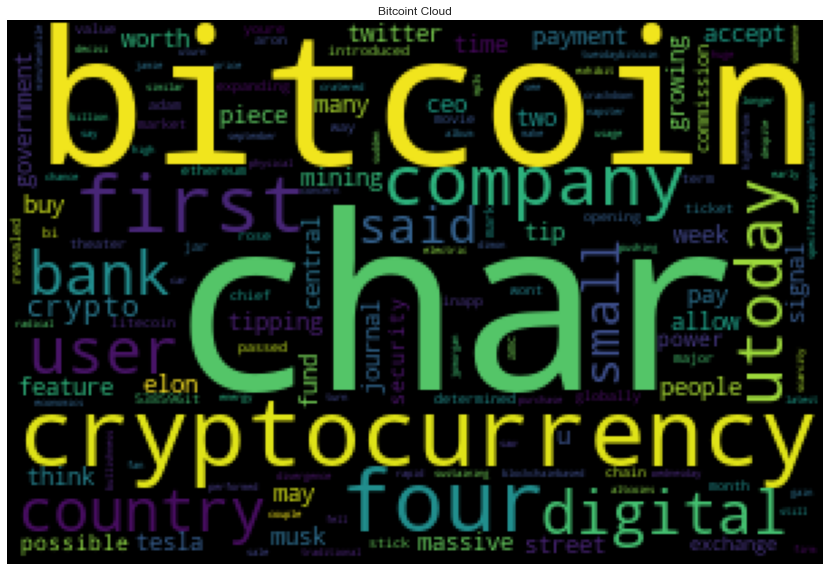

In [115]:
# Generate the Bitcoin word cloud
show_cloud(bit_list, "Bitcoint Cloud")

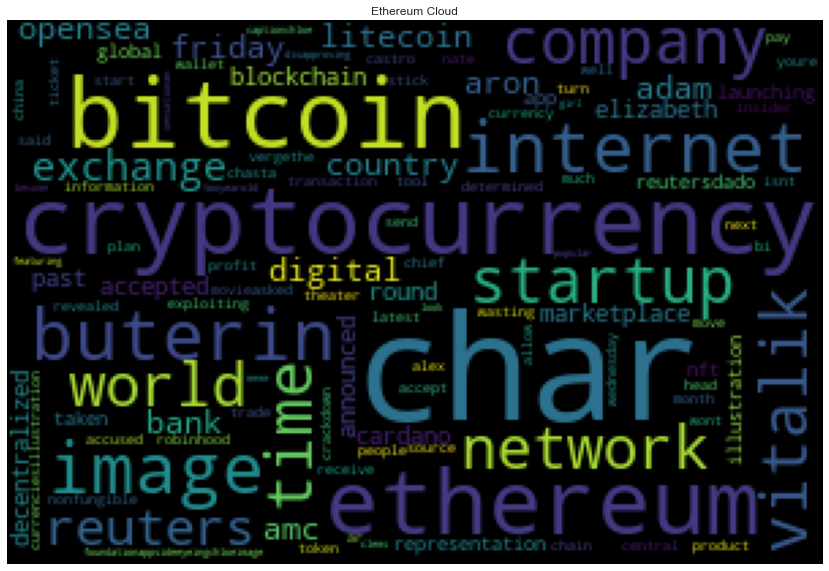

In [116]:
# Generate the Ethereum word cloud
show_cloud(eth_list, "Ethereum Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [117]:
# pip install -U spacy

In [118]:
import spacy
from spacy import displacy

In [119]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [120]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [121]:
# Concatenate all of the Bitcoin text together
# Run the NER processor on all of the text
# Add a title to the document
# Render the visualization

def show_entity(w_list, title):
    words = " ".join(w_list)
    document = nlp(words)
    document.user_data["title"] = title
    displacy.render(document, style="ent", jupyter=True)
    return document
bit_doc = show_entity(bit_list, "Bitcoin Entity")

In [122]:
# List all Entities
for x in bit_doc.ents:
    print(x.text, x.label_)

1198 DATE
four month twitter DATE
first ORDINAL
first ORDINAL
2390 CARDINAL
46 CARDINAL
50000 mark MONEY
first ORDINAL
four week DATE
50000 CARDINAL
early september DATE
8436 DATE
jamie dimon PERSON
3069 CARDINAL
16 billion CARDINAL
wednesday DATE
8443 CARDINAL
alex castro PERSON
china GPE
friday DATE
1461 DATE
last week DATE
wall street journal ORG
three CARDINAL
9512 CARDINAL
2802 DATE
el salvador GPE
1352 DATE
2719 CARDINAL
two decade DATE
403 million CARDINAL
23 august DATE
uk GPE
four CARDINAL
3680 CARDINAL
sec ORG
two CARDINAL
utoday DATE
kristalina georgieva time PERSON
2917 CARDINAL
tuesday DATE
1892 DATE
canada GPE
alberta GPE
2770 DATE
19 CARDINAL
3500 CARDINAL
u security exchange commission ORG
four CARDINAL
october DATE


---

### Ethereum NER

In [124]:
# Concatenate all of the Etherum text together
# Run the NER processor on all of the text
# Add a title to the document
# Render the visualization

def show_entity2(w_list, title):
    words = " ".join(w_list)
    document = nlp(words)
    document.user_data["title"] = title
    displacy.render(document, style="ent", jupyter=True)
    return document
eth_doc = show_entity(bit_list, "Ethereum Entity")

---